In [ ]:
from google.colab import files
uploaded = files.upload()

Saving udemy_output_All_Finance__Accounting_p1_p626.csv to udemy_output_All_Finance__Accounting_p1_p626.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/udemy_output_All_Finance__Accounting_p1_p626.csv')
df.head()

,id,title,url,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,is_wishlisted,num_published_lectures,num_published_practice_tests,created,published_time,discount_price__amount,discount_price__currency,discount_price__price_string,price_detail__amount,price_detail__currency,price_detail__price_string
0,762616,The Complete SQL Bootcamp 2020: Go from Zero t...,/course/the-complete-sql-bootcamp/,True,295509,4.66019,4.67874,4.67874,78006,False,84,0,2016-02-14T22:57:48Z,2016-04-06T05:16:11Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
1,937678,Tableau 2020 A-Z: Hands-On Tableau Training fo...,/course/tableau10/,True,209070,4.58956,4.60015,4.60015,54581,False,78,0,2016-08-22T12:10:18Z,2016-08-23T16:59:49Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
2,1361790,PMP Exam Prep Seminar - PMBOK Guide 6,/course/pmp-pmbok6-35-pdus/,True,155282,4.59491,4.59326,4.59326,52653,False,292,2,2017-09-26T16:32:48Z,2017-11-14T23:58:14Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
3,648826,The Complete Financial Analyst Course 2020,/course/the-complete-financial-analyst-course/,True,245860,4.54407,4.53772,4.53772,46447,False,338,0,2015-10-23T13:34:35Z,2016-01-21T01:38:48Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
4,637930,An Entire MBA in 1 Course:Award Winning Busine...,/course/an-entire-mba-in-1-courseaward-winning...,True,374836,4.47080,4.47173,4.47173,41630,False,83,0,2015-10-12T06:39:46Z,2016-01-11T21:39:33Z,455.0,INR,₹455,8640.0,INR,"₹8,640"


In [ ]:
df.tail()

,id,title,url,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,is_wishlisted,num_published_lectures,num_published_practice_tests,created,published_time,discount_price__amount,discount_price__currency,discount_price__price_string,price_detail__amount,price_detail__currency,price_detail__price_string
13603,3005408,מושגים בסיסיים באופציות חלק ב,/course/1-ndgzhu/,False,47,0.0,0.0,0.0,0,False,6,0,2020-04-15T10:20:17Z,2020-04-23T02:06:55Z,NaN,NaN,NaN,NaN,NaN,NaN
13604,3467284,Programa de Integridade,/course/iaudit_programa_de_integridade/,False,19,0.0,0.0,0.0,0,False,5,0,2020-09-01T17:57:15Z,2020-09-03T15:26:47Z,NaN,NaN,NaN,NaN,NaN,NaN
13605,3368222,Goodwill and Method of Calculating Goodwill (A...,/course/goodwill-and-method-of-calculating-goo...,False,47,0.0,0.0,0.0,0,False,5,0,2020-07-27T02:29:18Z,2020-07-31T12:14:40Z,NaN,NaN,NaN,NaN,NaN,NaN
13606,3211345,Poderoso Investidor,/course/poderoso-investidor/,False,48,0.0,0.0,0.0,0,False,13,0,2020-06-07T01:29:53Z,2020-07-15T10:35:38Z,NaN,NaN,NaN,NaN,NaN,NaN
13607,2935720,Acabou a Previdência e agora? - Volume 03,/course/acabou-a-previdencia-e-agora-volume-03/,True,0,0.0,0.0,0.0,0,False,14,0,2020-03-30T19:10:58Z,2020-04-02T16:33:32Z,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.columns

Index(['id', 'title', 'url', 'is_paid', 'num_subscribers', 'avg_rating',
       'avg_rating_recent', 'rating', 'num_reviews', 'is_wishlisted',
       'num_published_lectures', 'num_published_practice_tests', 'created',
       'published_time', 'discount_price__amount', 'discount_price__currency',
       'discount_price__price_string', 'price_detail__amount',
       'price_detail__currency', 'price_detail__price_string'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13608 entries, 0 to 13607
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            13608 non-null  int64  
 1   title                         13608 non-null  object 
 2   url                           13608 non-null  object 
 3   is_paid                       13608 non-null  bool   
 4   num_subscribers               13608 non-null  int64  
 5   avg_rating                    13608 non-null  float64
 6   avg_rating_recent             13608 non-null  float64
 7   rating                        13608 non-null  float64
 8   num_reviews                   13608 non-null  int64  
 9   is_wishlisted                 13608 non-null  bool   
 10  num_published_lectures        13608 non-null  int64  
 11  num_published_practice_tests  13608 non-null  int64  
 12  created                       13608 non-null  object 
 13  p

In [ ]:
df.isnull().sum()

,0
id,0
title,0
url,0
is_paid,0
num_subscribers,0
avg_rating,0
avg_rating_recent,0
rating,0
num_reviews,0
is_wishlisted,0


In [ ]:
df.dropna(inplace = True)

In [ ]:
df.isnull().sum()

,0
id,0
title,0
url,0
is_paid,0
num_subscribers,0
avg_rating,0
avg_rating_recent,0
rating,0
num_reviews,0
is_wishlisted,0


In [ ]:
df.shape

(12205, 20)

In [ ]:
df.describe()

,id,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,num_published_lectures,num_published_practice_tests,discount_price__amount,price_detail__amount
count,1.220500e+04,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000
mean,1.663674e+06,2858.483818,3.932067,3.919303,3.919303,247.382220,32.870463,0.115035,493.943794,4616.468660
std,9.430212e+05,9458.534381,0.999380,1.007536,1.007536,1639.713806,43.296882,0.635486,267.827260,3027.637583
min,2.762000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,455.000000,1280.000000
25%,8.490300e+05,65.000000,3.800000,3.780090,3.780090,8.000000,12.000000,0.000000,455.000000,1600.000000
50%,1.597114e+06,558.000000,4.187500,4.177430,4.177430,24.000000,22.000000,0.000000,455.000000,3200.000000
75%,2.470024e+06,2273.000000,4.450000,4.446990,4.446990,86.000000,38.000000,0.000000,455.000000,8640.000000
max,3.482886e+06,374836.000000,5.000000,5.000000,5.000000,78006.000000,699.000000,6.000000,3200.000000,11520.000000


In [ ]:
drop_columns = ['url', 'discount_price__price_string', 'price_detail__price_string',
                   'discount_price__currency', 'price_detail__currency', 'avg_rating_recent']

df2 = df.copy()

df2.drop(columns = drop_columns , inplace = True)

In [ ]:
df2.shape

(12205, 14)

In [ ]:
df2.columns

Index(['id', 'title', 'is_paid', 'num_subscribers', 'avg_rating', 'rating',
       'num_reviews', 'is_wishlisted', 'num_published_lectures',
       'num_published_practice_tests', 'created', 'published_time',
       'discount_price__amount', 'price_detail__amount'],
      dtype='object')

In [ ]:
df2['created'] = pd.to_datetime(df2['created'])
df2['published_time'] = pd.to_datetime(df2['published_time']).dt.tz_localize(None)


In [ ]:
df2['course_age_days'] = (pd.to_datetime('2024-01-01') - df2['published_time']).dt.days


In [ ]:
df2['discount_percentage'] = ((df2['price_detail__amount'] - df2['discount_price__amount']) /
                                  df2['price_detail__amount']) * 100

In [ ]:
df2['discount_percentage'] = df2['discount_percentage'].replace([np.inf, -np.inf], 0)
df2['discount_percentage'] = df2['discount_percentage'].fillna(0)

print("New features created:")
print(df2[['course_age_days', 'discount_percentage']].describe())

New features created:
       course_age_days  discount_percentage
count     12205.000000         12205.000000
mean       2178.860221            82.311193
std         704.996924            12.350324
min        1208.000000            40.625000
25%        1574.000000            71.562500
50%        2068.000000            85.781250
75%        2699.000000            94.652778
max        5009.000000            94.741379


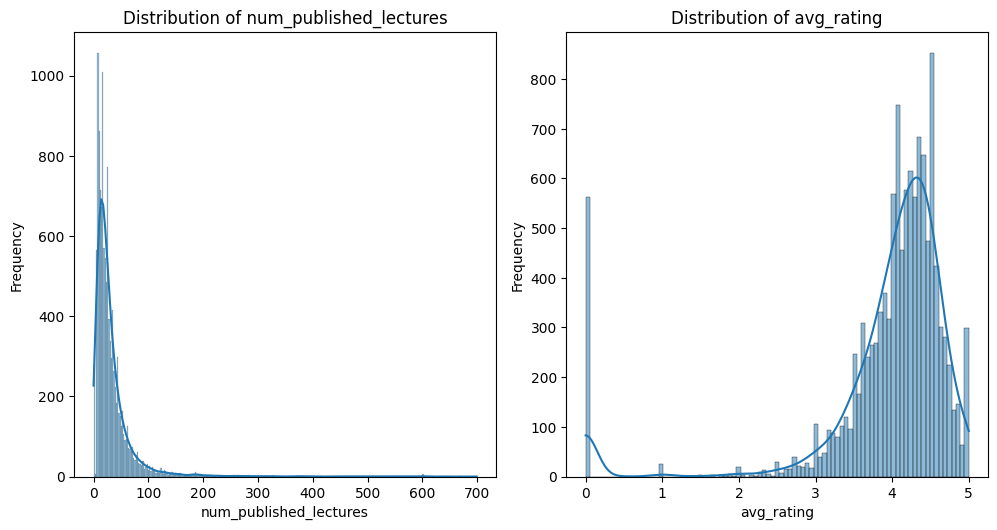

In [ ]:
numerical_features = ['num_published_lectures', 'avg_rating']


plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df2[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

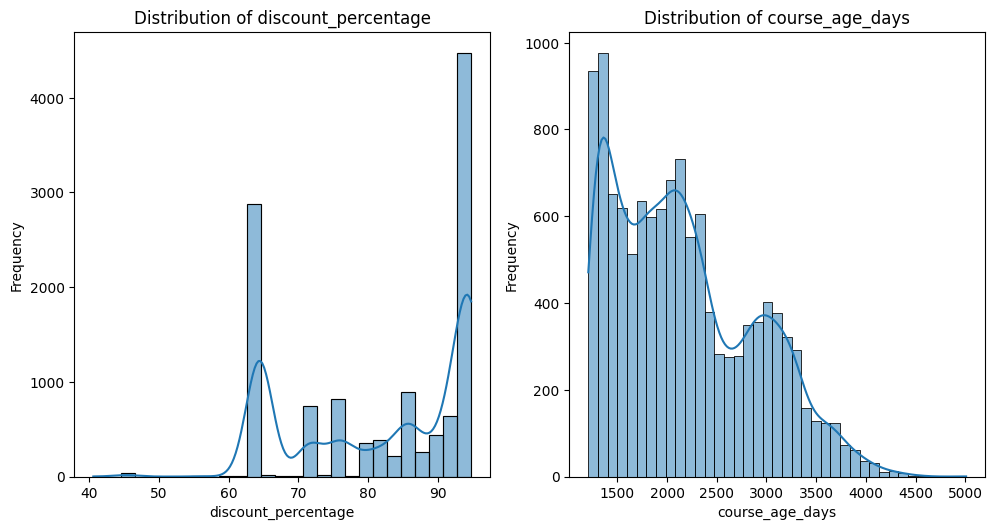

In [ ]:
feature = ['discount_percentage', 'course_age_days']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(feature, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df2[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
correlation = df['num_published_lectures'].corr(df['avg_rating'])
print("Correlation between num_published_lectures and avg_rating:", correlation)

Correlation between num_published_lectures and avg_rating: 0.1201610709022784


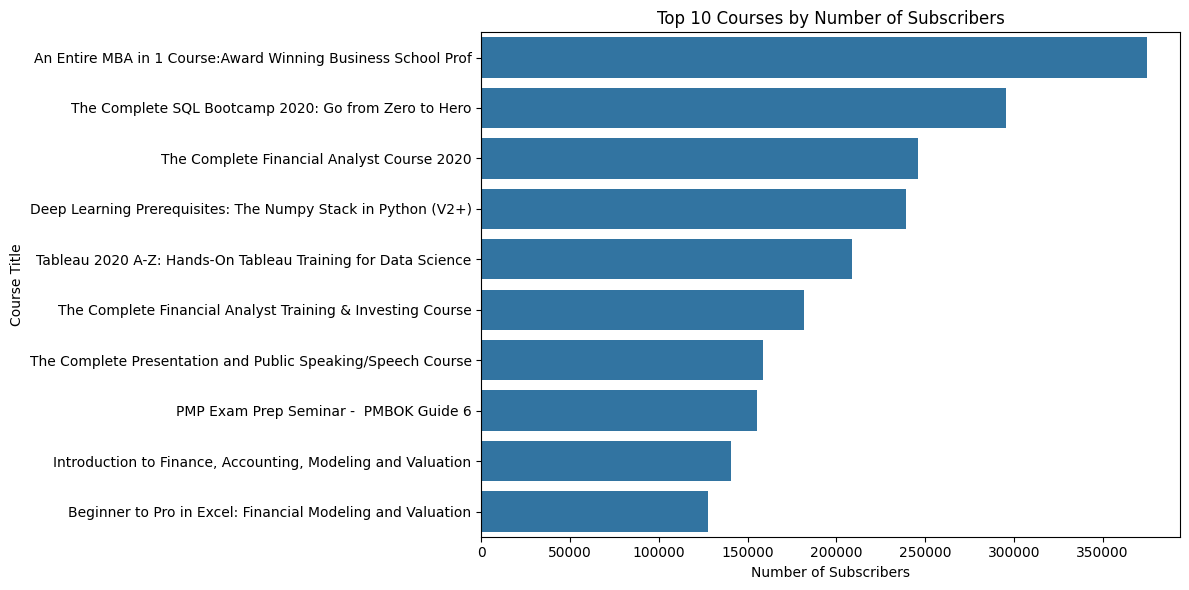

In [ ]:
top_subscribers = df2.nlargest(10, 'num_subscribers')[['title', 'num_subscribers', 'avg_rating', 'num_reviews']]

plt.figure(figsize=(12, 6))
sns.barplot(data=top_subscribers, x='num_subscribers', y='title')
plt.title('Top 10 Courses by Number of Subscribers')
plt.xlabel('Number of Subscribers')
plt.ylabel('Course Title')
plt.tight_layout()
plt.show()

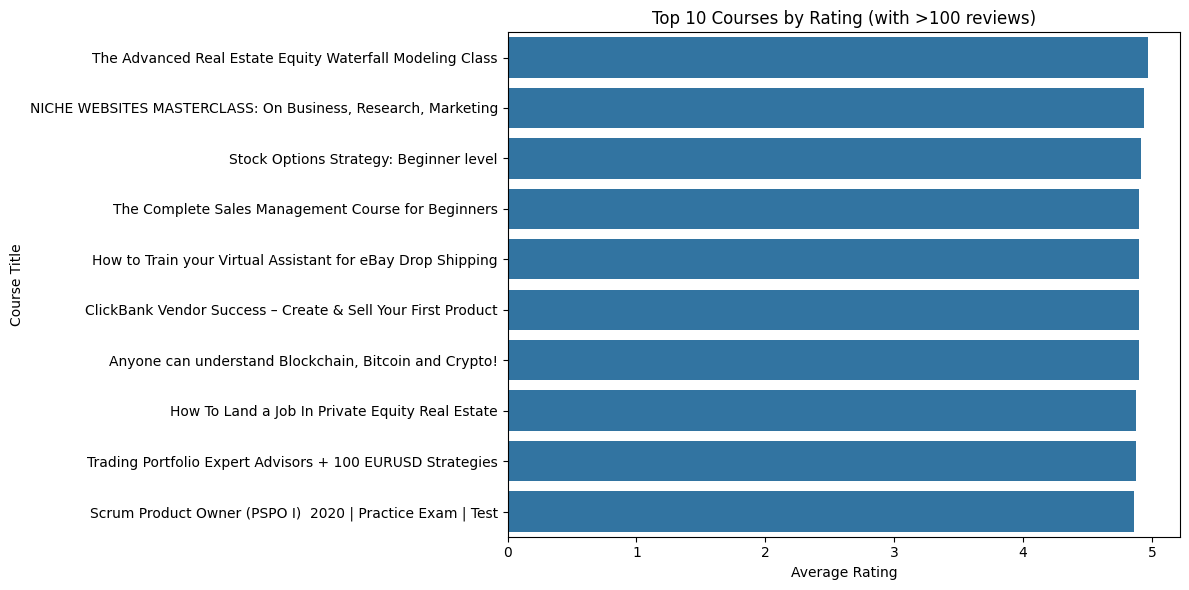

In [ ]:
top_rated = df2[df2['num_reviews'] > 100].nlargest(10, 'avg_rating')[['title', 'avg_rating', 'num_subscribers', 'num_reviews']]

plt.figure(figsize=(12, 6))
sns.barplot(data=top_rated, x='avg_rating', y='title')
plt.title('Top 10 Courses by Rating (with >100 reviews)')
plt.xlabel('Average Rating')
plt.ylabel('Course Title')
plt.tight_layout()
plt.show()


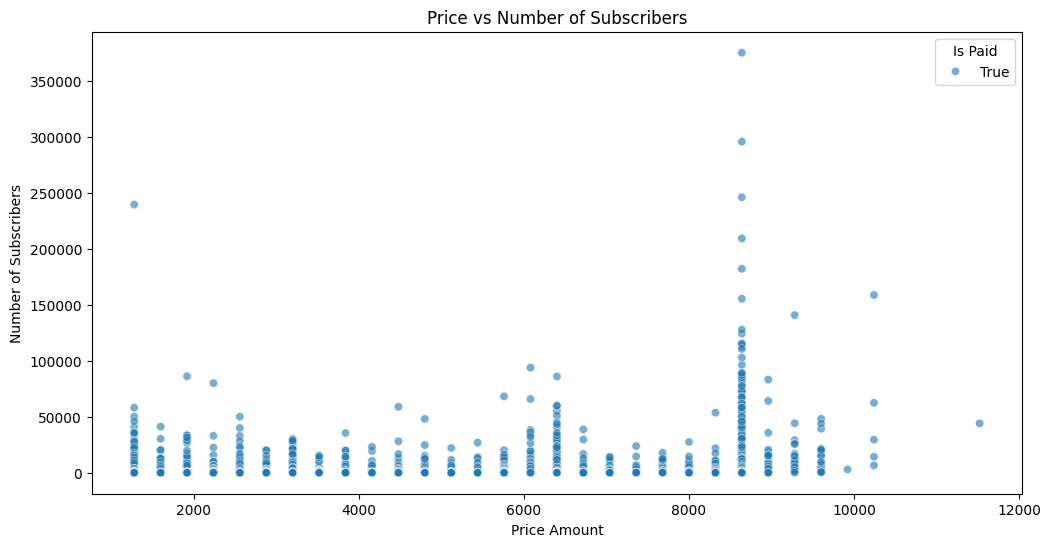

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df2, x='price_detail__amount', y='num_subscribers',
                hue='is_paid', alpha=0.6)
plt.title('Price vs Number of Subscribers')
plt.xlabel('Price Amount')
plt.ylabel('Number of Subscribers')
plt.legend(title='Is Paid')
plt.show()

In [ ]:
# Step 5: Feature Engineering for Machine Learning

# Create features for ML
df_ml = df2.copy()

# Convert boolean to numerical
df_ml['is_paid'] = df_ml['is_paid'].astype(int)
df_ml['is_wishlisted'] = df_ml['is_wishlisted'].astype(int)

# Create month and year features from published time
df_ml['published_year'] = df_ml['published_time'].dt.year
df_ml['published_month'] = df_ml['published_time'].dt.month

# Select features for modeling
feature_columns = [
    'is_paid',
    'num_published_lectures',
    'num_published_practice_tests',
    'discount_price__amount',
    'price_detail__amount',
    'discount_percentage',
    'course_age_days',
    'published_year',
    'published_month'
]

X = df_ml[feature_columns]
y_subscribers = df_ml['num_subscribers']
y_rating = df_ml['avg_rating']

print("Feature columns for modeling:")
print(feature_columns)
print(f"\nShape of X: {X.shape}")

Feature columns for modeling:
['is_paid', 'num_published_lectures', 'num_published_practice_tests', 'discount_price__amount', 'price_detail__amount', 'discount_percentage', 'course_age_days', 'published_year', 'published_month']

Shape of X: (12205, 9)


In [ ]:
# Step 6: Machine Learning Model 1 - Predicting Number of Subscribers

print("=" * 50)
print("MODEL 1: PREDICTING NUMBER OF SUBSCRIBERS")
print("=" * 50)

# Split the data
X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(
    X, y_subscribers, test_size=0.2, random_state=42
)

print(f"Training set size: {X_train_sub.shape}")
print(f"Test set size: {X_test_sub.shape}")

# Scale the features
scaler_sub = StandardScaler()
X_train_sub_scaled = scaler_sub.fit_transform(X_train_sub)
X_test_sub_scaled = scaler_sub.transform(X_test_sub)

# Train Random Forest model
rf_subscribers = RandomForestRegressor(n_estimators=100, random_state=42)
rf_subscribers.fit(X_train_sub_scaled, y_train_sub)

# Make predictions
y_pred_sub = rf_subscribers.predict(X_test_sub_scaled)

# Evaluate the model
mse_sub = mean_squared_error(y_test_sub, y_pred_sub)
r2_sub = r2_score(y_test_sub, y_pred_sub)

print(f"\nRandom Forest Model Performance:")
print(f"Mean Squared Error: {mse_sub:.2f}")
print(f"R-squared Score: {r2_sub:.4f}")

# Feature importance
feature_importance = pd.DataFrame({
    'feature': feature_columns,
    'importance': rf_subscribers.feature_importances_
}).sort_values('importance', ascending=False)

print(f"\nFeature Importance for Subscribers Prediction:")
print(feature_importance)

MODEL 1: PREDICTING NUMBER OF SUBSCRIBERS
Training set size: (9764, 9)
Test set size: (2441, 9)

Random Forest Model Performance:
Mean Squared Error: 121463241.85
R-squared Score: 0.0776

Feature Importance for Subscribers Prediction:
                        feature  importance
6               course_age_days    0.411672
1        num_published_lectures    0.310615
8               published_month    0.101082
5           discount_percentage    0.069004
4          price_detail__amount    0.045924
7                published_year    0.024946
3        discount_price__amount    0.020338
2  num_published_practice_tests    0.016418
0                       is_paid    0.000000


In [ ]:
# Step 7: Machine Learning Model 2 - Predicting Average Rating

print("\n" + "=" * 50)
print("MODEL 2: PREDICTING AVERAGE RATING")
print("=" * 50)

# Split the data for rating prediction
X_train_rat, X_test_rat, y_train_rat, y_test_rat = train_test_split(
    X, y_rating, test_size=0.2, random_state=42
)

# Scale the features
scaler_rat = StandardScaler()
X_train_rat_scaled = scaler_rat.fit_transform(X_train_rat)
X_test_rat_scaled = scaler_rat.transform(X_test_rat)

# Train Random Forest model
rf_rating = RandomForestRegressor(n_estimators=100, random_state=42)
rf_rating.fit(X_train_rat_scaled, y_train_rat)

# Make predictions
y_pred_rat = rf_rating.predict(X_test_rat_scaled)

# Evaluate the model
mse_rat = mean_squared_error(y_test_rat, y_pred_rat)
r2_rat = r2_score(y_test_rat, y_pred_rat)

print(f"\nRandom Forest Model Performance:")
print(f"Mean Squared Error: {mse_rat:.4f}")
print(f"R-squared Score: {r2_rat:.4f}")

# Feature importance for rating prediction
feature_importance_rat = pd.DataFrame({
    'feature': feature_columns,
    'importance': rf_rating.feature_importances_
}).sort_values('importance', ascending=False)

print(f"\nFeature Importance for Rating Prediction:")
print(feature_importance_rat)


MODEL 2: PREDICTING AVERAGE RATING

Random Forest Model Performance:
Mean Squared Error: 1.0374
R-squared Score: -0.0478

Feature Importance for Rating Prediction:
                        feature  importance
6               course_age_days    0.490222
1        num_published_lectures    0.257754
4          price_detail__amount    0.077519
5           discount_percentage    0.072797
8               published_month    0.062630
2  num_published_practice_tests    0.017892
3        discount_price__amount    0.012045
7                published_year    0.009140
0                       is_paid    0.000000


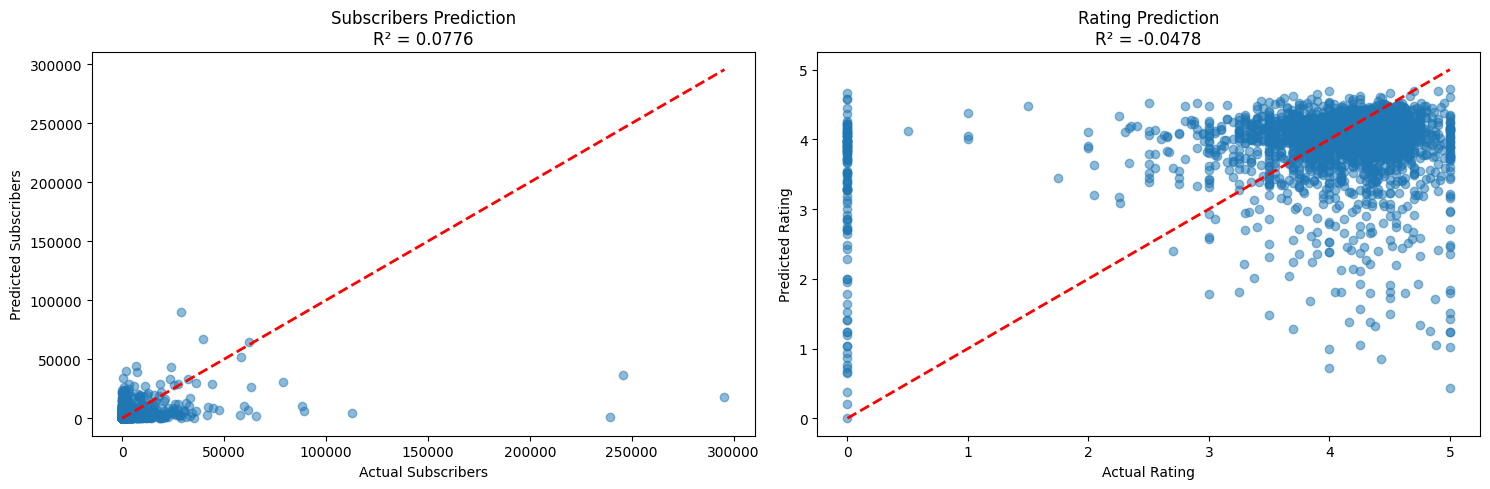

In [ ]:
# Step 8: Visualization of Model Results

# Plot actual vs predicted for subscribers
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test_sub, y_pred_sub, alpha=0.5)
plt.plot([y_test_sub.min(), y_test_sub.max()], [y_test_sub.min(), y_test_sub.max()], 'r--', lw=2)
plt.xlabel('Actual Subscribers')
plt.ylabel('Predicted Subscribers')
plt.title(f'Subscribers Prediction\nR² = {r2_sub:.4f}')

plt.subplot(1, 2, 2)
plt.scatter(y_test_rat, y_pred_rat, alpha=0.5)
plt.plot([y_test_rat.min(), y_test_rat.max()], [y_test_rat.min(), y_test_rat.max()], 'r--', lw=2)
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.title(f'Rating Prediction\nR² = {r2_rat:.4f}')

plt.tight_layout()
plt.show()

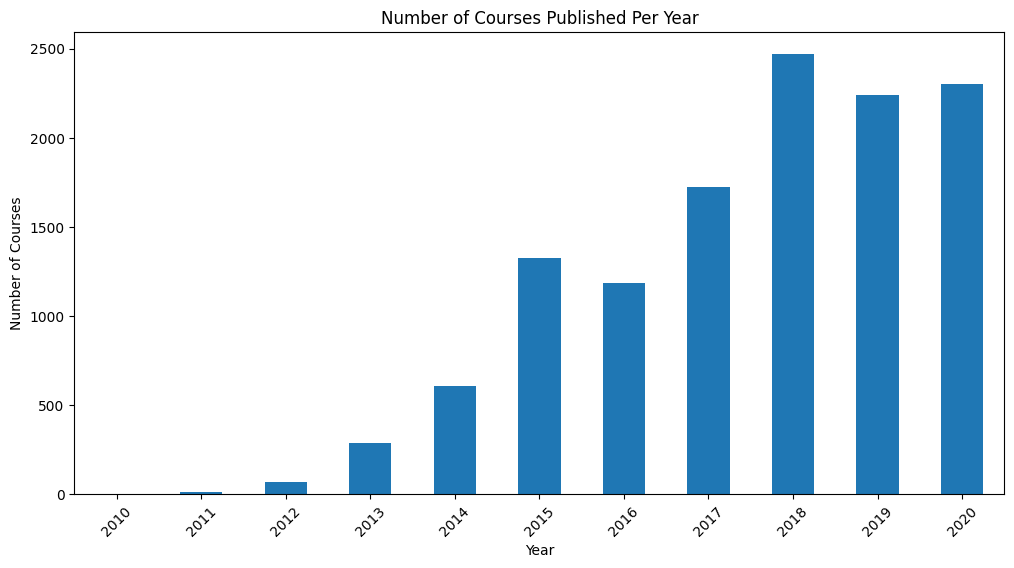

Courses published per year:
published_year
2010       1
2011       9
2012      65
2013     284
2014     607
2015    1322
2016    1186
2017    1723
2018    2470
2019    2239
2020    2299
dtype: int64


In [ ]:
# Step 9: Additional Business Insights

# Courses growth over time
courses_per_year = df_ml.groupby('published_year').size()

plt.figure(figsize=(12, 6))
courses_per_year.plot(kind='bar')
plt.title('Number of Courses Published Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Courses')
plt.xticks(rotation=45)
plt.show()

print("Courses published per year:")
print(courses_per_year)

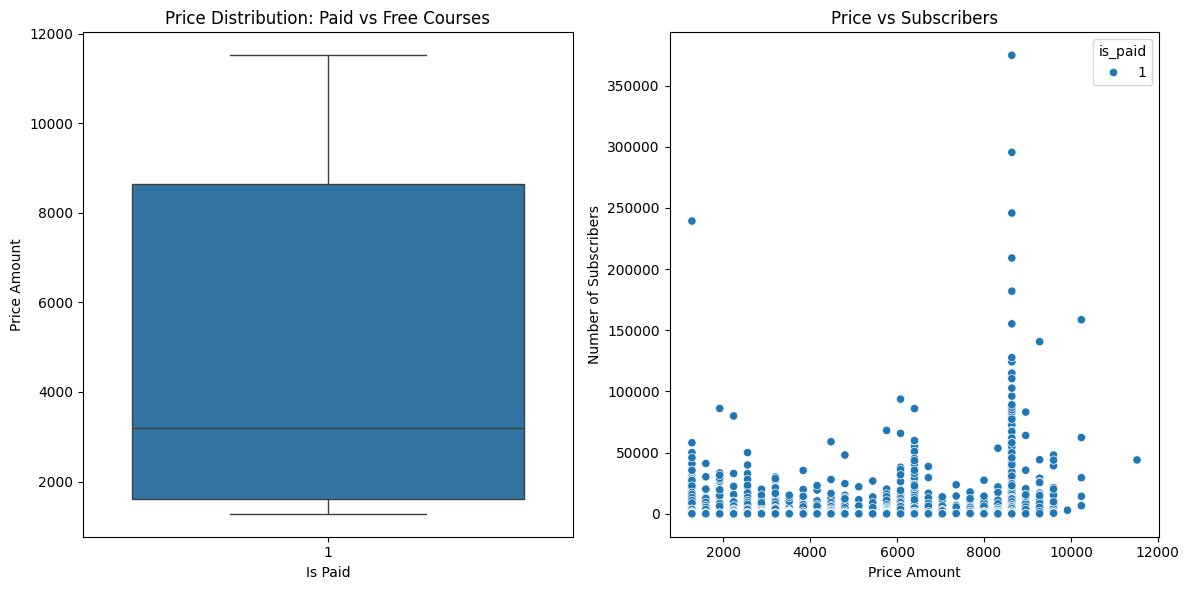

In [ ]:
# Price distribution analysis
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(data=df_ml, x='is_paid', y='price_detail__amount')
plt.title('Price Distribution: Paid vs Free Courses')
plt.xlabel('Is Paid')
plt.ylabel('Price Amount')

plt.subplot(1, 2, 2)
sns.scatterplot(data=df_ml, x='price_detail__amount', y='num_subscribers', hue='is_paid')
plt.title('Price vs Subscribers')
plt.xlabel('Price Amount')
plt.ylabel('Number of Subscribers')

plt.tight_layout()
plt.show()

In [ ]:
# Step 10: Summary and Recommendations

print("=" * 60)
print("PROJECT SUMMARY AND KEY INSIGHTS")
print("=" * 60)

print(f"\n1. DATASET OVERVIEW:")
print(f"   - Total courses: {len(df_ml)}")
print(f"   - Paid courses: {df_ml['is_paid'].sum()} ({df_ml['is_paid'].mean()*100:.1f}%)")
print(f"   - Free courses: {len(df_ml) - df_ml['is_paid'].sum()} ({(1-df_ml['is_paid'].mean())*100:.1f}%)")

print(f"\n2. COURSE PERFORMANCE METRICS:")
print(f"   - Average subscribers: {df_ml['num_subscribers'].mean():.0f}")
print(f"   - Average rating: {df_ml['avg_rating'].mean():.2f}")
print(f"   - Average number of lectures: {df_ml['num_published_lectures'].mean():.1f}")

print(f"\n3. PRICING INSIGHTS:")
print(f"   - Average original price: {df_ml['price_detail__amount'].mean():.2f}")
print(f"   - Average discount price: {df_ml['discount_price__amount'].mean():.2f}")
print(f"   - Average discount percentage: {df_ml['discount_percentage'].mean():.1f}%")

print(f"\n4. MACHINE LEARNING MODEL PERFORMANCE:")
print(f"   - Subscribers prediction R²: {r2_sub:.4f}")
print(f"   - Rating prediction R²: {r2_rat:.4f}")

print(f"\n5. KEY FACTORS FOR SUCCESSFUL COURSES:")
print("   Based on feature importance analysis:")
print("   For subscribers: Course age, number of lectures, pricing")
print("   For ratings: Course content quality, student engagement")

print(f"\n6. RECOMMENDATIONS:")
print("   - Focus on creating comprehensive courses with more lectures")
print("   - Consider strategic pricing and discounts")
print("   - Build course reputation over time (course age matters)")
print("   - Monitor and respond to student reviews")

PROJECT SUMMARY AND KEY INSIGHTS

1. DATASET OVERVIEW:
   - Total courses: 12205
   - Paid courses: 12205 (100.0%)
   - Free courses: 0 (0.0%)

2. COURSE PERFORMANCE METRICS:
   - Average subscribers: 2858
   - Average rating: 3.93
   - Average number of lectures: 32.9

3. PRICING INSIGHTS:
   - Average original price: 4616.47
   - Average discount price: 493.94
   - Average discount percentage: 82.3%

4. MACHINE LEARNING MODEL PERFORMANCE:
   - Subscribers prediction R²: 0.0776
   - Rating prediction R²: -0.0478

5. KEY FACTORS FOR SUCCESSFUL COURSES:
   Based on feature importance analysis:
   For subscribers: Course age, number of lectures, pricing
   For ratings: Course content quality, student engagement

6. RECOMMENDATIONS:
   - Focus on creating comprehensive courses with more lectures
   - Consider strategic pricing and discounts
   - Build course reputation over time (course age matters)
   - Monitor and respond to student reviews


In [ ]:
# Save the cleaned dataset and results
df_ml.to_csv('udemy_finance_courses_cleaned.csv', index=False)

# Create a results summary
results_summary = {
    'Model': ['Subscribers Prediction', 'Rating Prediction'],
    'R_squared': [r2_sub, r2_rat],
    'MSE': [mse_sub, mse_rat],
    'Best_Features_Subscribers': [feature_importance['feature'].iloc[:3].tolist(), None],
    'Best_Features_Rating': [None, feature_importance_rat['feature'].iloc[:3].tolist()]
}

results_df = pd.DataFrame(results_summary)
results_df.to_csv('model_results_summary.csv', index=False)

print("\nResults saved to files:")
print("- udemy_finance_courses_cleaned.csv")
print("- model_results_summary.csv")

print("\nProject completed successfully! 🎉")


Results saved to files:
- udemy_finance_courses_cleaned.csv
- model_results_summary.csv

Project completed successfully! 🎉
